In [2]:
#Swiss-roll dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding as LLE
from sklearn.manifold import MDS as MDS
from sklearn import datasets
from sklearn.decomposition import PCA as PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [3]:
swiss_roll = datasets.make_swiss_roll(n_samples=2000,  noise=0.0, random_state=None)
X = swiss_roll[0]
y = swiss_roll[1]
print(swiss_roll)


(array([[12.33271168,  0.1546458 , -1.60617029],
       [-9.02185572,  5.61275878, -3.91340106],
       [ 9.43141644,  5.86804057, -7.27221861],
       ...,
       [ 5.88664001, 18.12037597,  3.42397939],
       [-9.12858843,  9.63059105, -3.55410238],
       [ 5.79460624, 15.66908279, -1.60546978]]), array([12.43686296,  9.8340525 , 11.90952475, ...,  6.81000481,
        9.79605892,  6.01290235]))


In [4]:
#PCA Dimensionality reduction
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
print(X_r)
X_r[:,0]

[[ 4.76454881e+00  1.13066021e+01]
 [-9.33566866e+00 -5.63751857e+00]
 [-1.59662253e+00  1.11016920e+01]
 ...
 [ 5.06982647e+00  6.69307584e-03]
 [-9.13713680e+00 -6.65716222e+00]
 [ 9.04388785e-01  3.20045633e+00]]


array([ 4.76454881, -9.33566866, -1.59662253, ...,  5.06982647,
       -9.1371368 ,  0.90438879])

Text(0.5, 1.0, 'PCA of IRIS dataset')

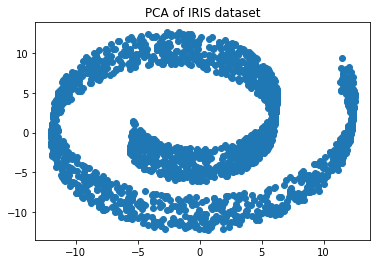

In [96]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw=2
plt.scatter(X_r[:, 0], X_r[:, 1] )
plt.title('PCA of IRIS dataset')

In [110]:
#LLE

In [98]:
for i in range(3, 15):
    clf = LLE(n_neighbors=i, n_components=2, method='standard') 
    X_lle = clf.fit_transform(X)
    print("when neighbors = %i" %i)
    print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
   

#choose the smallest reconstruction error then neighbors = 3

when neighbors = 3
Done. Reconstruction error: -2.98458e-17
when neighbors = 4
Done. Reconstruction error: 1.27933e-17
when neighbors = 5
Done. Reconstruction error: 2.49018e-17
when neighbors = 6
Done. Reconstruction error: 4.32272e-10
when neighbors = 7
Done. Reconstruction error: 1.5463e-09
when neighbors = 8
Done. Reconstruction error: 3.87167e-09
when neighbors = 9
Done. Reconstruction error: 3.54598e-08
when neighbors = 10
Done. Reconstruction error: 2.77337e-08
when neighbors = 11
Done. Reconstruction error: 2.75883e-08
when neighbors = 12
Done. Reconstruction error: 3.57576e-08
when neighbors = 13
Done. Reconstruction error: 4.97537e-08
when neighbors = 14
Done. Reconstruction error: 4.86542e-08


Text(0.5, 1.0, 'LLE of IRIS dataset')

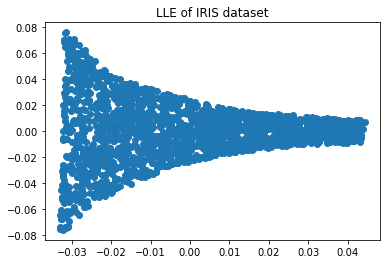

In [111]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw=2
plt.scatter(X_lle[:, 0], X_lle[:, 1] )
plt.title('LLE of IRIS dataset')

In [99]:
#MDS
mds = MDS(n_components=2)
X_m = mds.fit_transform(X)


Text(0.5, 1.0, 'MDS of IRIS dataset')

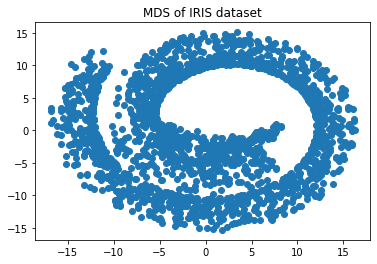

In [100]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw=2
plt.scatter(X_m[:, 0], X_m[:, 1] )
plt.title('MDS of IRIS dataset')

In [101]:
#t-SNE
from sklearn.manifold import TSNE as TSNE
tsne = TSNE(n_components=2)
X_t = mds.fit_transform(X)

Text(0.5, 1.0, 't-SNE of IRIS dataset')

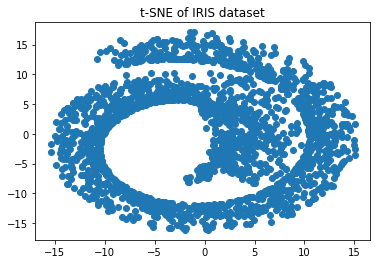

In [102]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw=2
plt.scatter(X_t[:, 0], X_t[:, 1] )
plt.title('t-SNE of IRIS dataset')

In [ ]:
#MDS reduces dimensionality while preserving distance between samples
#t-SNE reduces dimensionality while attempting to keep similar samples close and different samples apart. It is mainly used for visualisation, especially for visualising clusters in high-dimensional spaces.
#Both MDS and t-SNE are good, but the computation time is too slow, so I choose LLE